# Statistical Methods Project

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats.mstats import winsorize
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_white

# EDA (data description, data preprocessing)

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/ov3ipo/SM_Project/main/life_expectancy.csv")
# remove trailing space in columns name and format display function
pd.options.display.float_format = '{:.4f}'.format
df = df.rename(columns=lambda x: x.strip())

# overview on data statistic
display(df.head(10))
display(df.info())

# get quantitative and qualitative data
numeric_cols = df.drop(columns=["Status", "Country"], axis=1).columns

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0000,263.0000,62,0.0100,71.2796,65.0000,1154,...,6.0000,8.1600,65.0000,0.1000,584.2592,33736494.0000,17.2000,17.3000,0.4790,10.1000
1,Afghanistan,2014,Developing,59.9000,271.0000,64,0.0100,73.5236,62.0000,492,...,58.0000,8.1800,62.0000,0.1000,612.6965,327582.0000,17.5000,17.5000,0.4760,10.0000
2,Afghanistan,2013,Developing,59.9000,268.0000,66,0.0100,73.2192,64.0000,430,...,62.0000,8.1300,64.0000,0.1000,631.7450,31731688.0000,17.7000,17.7000,0.4700,9.9000
3,Afghanistan,2012,Developing,59.5000,272.0000,69,0.0100,78.1842,67.0000,2787,...,67.0000,8.5200,67.0000,0.1000,669.9590,3696958.0000,17.9000,18.0000,0.4630,9.8000
4,Afghanistan,2011,Developing,59.2000,275.0000,71,0.0100,7.0971,68.0000,3013,...,68.0000,7.8700,68.0000,0.1000,63.5372,2978599.0000,18.2000,18.2000,0.4540,9.5000
5,Afghanistan,2010,Developing,58.8000,279.0000,74,0.0100,79.6794,66.0000,1989,...,66.0000,9.2000,66.0000,0.1000,553.3289,2883167.0000,18.4000,18.4000,0.4480,9.2000
6,Afghanistan,2009,Developing,58.6000,281.0000,77,0.0100,56.7622,63.0000,2861,...,63.0000,9.4200,63.0000,0.1000,445.8933,284331.0000,18.6000,18.7000,0.4340,8.9000
7,Afghanistan,2008,Developing,58.1000,287.0000,80,0.0300,25.8739,64.0000,1599,...,64.0000,8.3300,64.0000,0.1000,373.3611,2729431.0000,18.8000,18.9000,0.4330,8.7000
8,Afghanistan,2007,Developing,57.5000,295.0000,82,0.0200,10.9102,63.0000,1141,...,63.0000,6.7300,63.0000,0.1000,369.8358,26616792.0000,19.0000,19.1000,0.4150,8.4000
9,Afghanistan,2006,Developing,57.3000,295.0000,84,0.0300,17.1715,64.0000,1990,...,58.0000,7.4300,58.0000,0.1000,272.5638,2589345.0000,19.2000,19.3000,0.4050,8.1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

None

## Data description

### Univariate

#### Qualitative

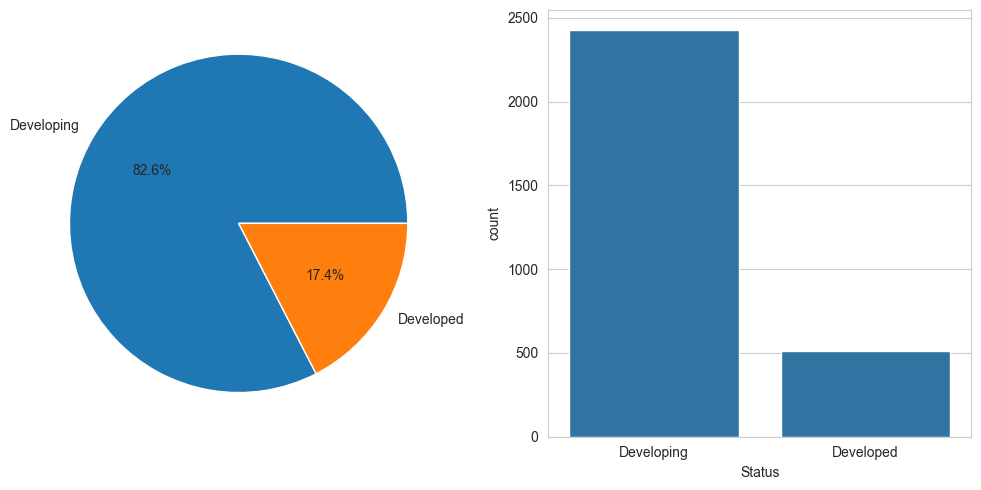

In [5]:
plt.figure(figsize = (10,5))
plt.subplot(1, 2, 1)
x = df['Status'].value_counts().reset_index()
plt.pie(x=x['count'], labels=x['Status'], autopct="%0.1f%%")
plt.subplot(1, 2, 2)
sns.countplot(df, x="Status")
plt.tight_layout()
plt.show()

#### Quantitative

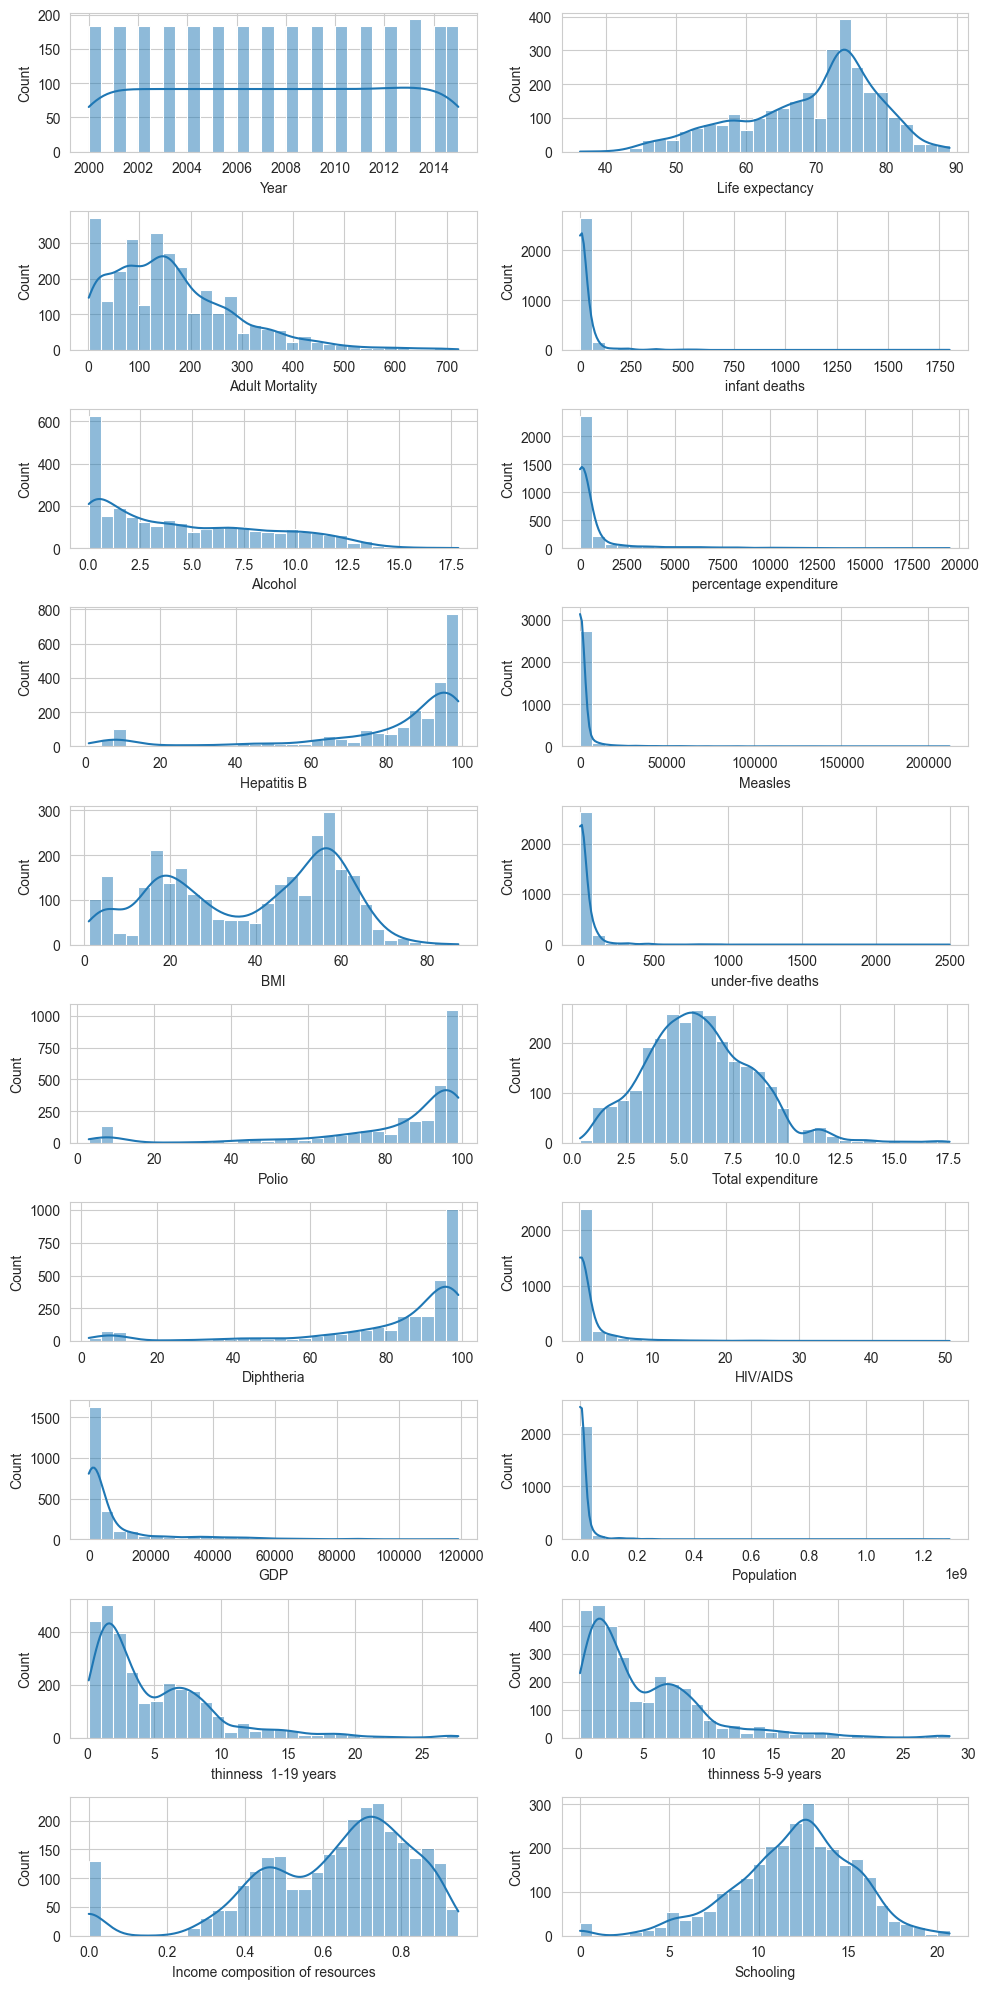

In [6]:
plt.figure(figsize=(10, 20))
for i, col in enumerate(numeric_cols):
    plt.subplot(10, 2, i + 1)
    sns.histplot(df, x=col, bins=30, kde=True)
plt.tight_layout()
plt.show()

### Bivariate

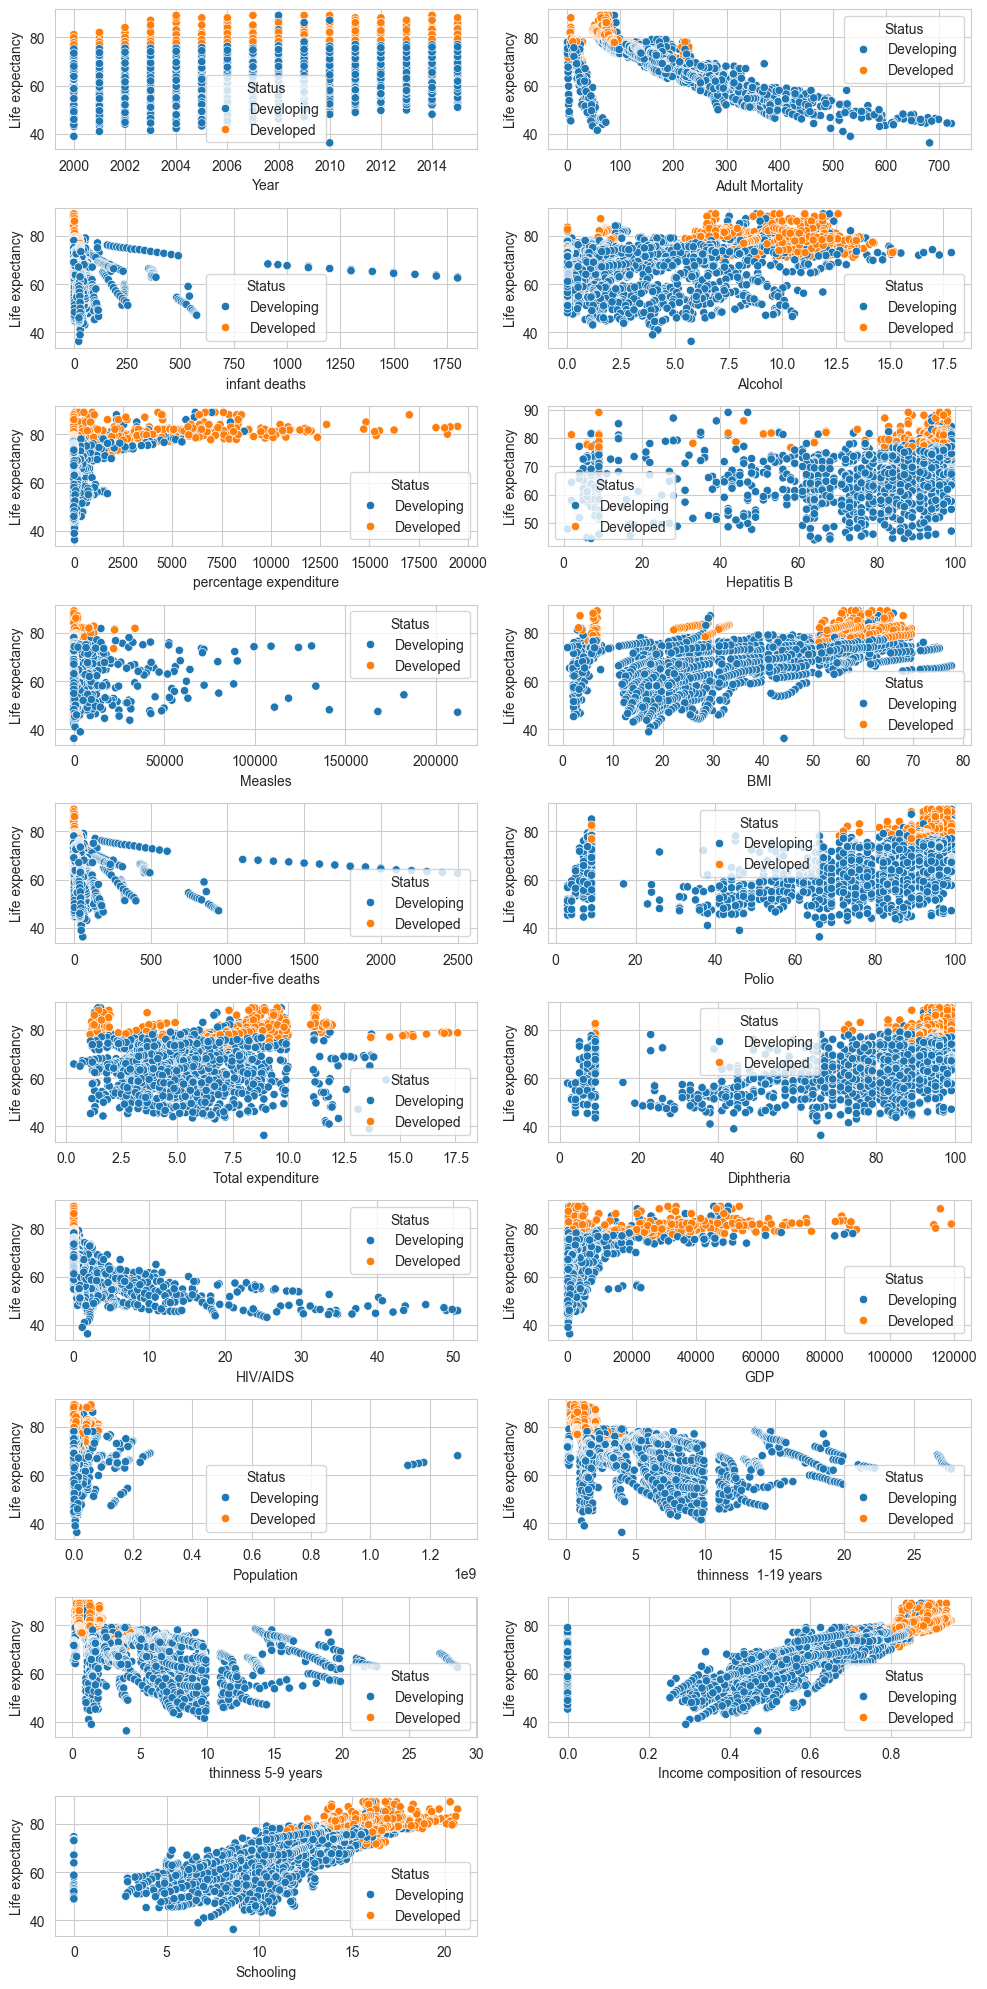

In [7]:
plt.figure(figsize=(10, 20))
index = np.argwhere(numeric_cols=="Life expectancy")
for i, col in enumerate(np.delete(numeric_cols, index)):
    plt.subplot(10, 2, i + 1)
    sns.scatterplot(df, x=col, y="Life expectancy", hue="Status", legend="auto")
plt.tight_layout()
plt.show()

### Overall statistic

In [8]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Year,2938.0000,2007.5187,4.6138,2000.0000,2004.0000,2008.0000,2012.0000,2015.0000
Life expectancy,2928.0000,69.2249,9.5239,36.3000,63.1000,72.1000,75.7000,89.0000
Adult Mortality,2928.0000,164.7964,124.2921,1.0000,74.0000,144.0000,228.0000,723.0000
infant deaths,2938.0000,30.3039,117.9265,0.0000,0.0000,3.0000,22.0000,1800.0000
Alcohol,2744.0000,4.6029,4.0524,0.0100,0.8775,3.7550,7.7025,17.8700
percentage expenditure,2938.0000,738.2513,1987.9149,0.0000,4.6853,64.9129,441.5341,19479.9116
Hepatitis B,2385.0000,80.9405,25.0700,1.0000,77.0000,92.0000,97.0000,99.0000
Measles,2938.0000,2419.5922,11467.2725,0.0000,0.0000,17.0000,360.2500,212183.0000
BMI,2904.0000,38.3212,20.0440,1.0000,19.3000,43.5000,56.2000,87.3000
under-five deaths,2938.0000,42.0357,160.4455,0.0000,0.0000,4.0000,28.0000,2500.0000


## Data preprocessing (NAs, outliers, duplicateds, label encoding)

### Missing

In [9]:
print("\nPreprocessing\n")
print(df.isna().sum())
df = df.interpolate(method='linear', limit_direction='forward')
print("\nPostprocessing\n")
print(df.isna().sum())


Preprocessing

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

Postprocessing

Country                            0
Year                               0
Status                

C:\Users\Hii\AppData\Local\Temp\ipykernel_21332\2977670138.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method='linear', limit_direction='forward')


### Duplicated

In [10]:
print(f"Total duplicated values: {df.duplicated().sum()}")

Total duplicated values: 0


### Outliers

#### Detect outliers

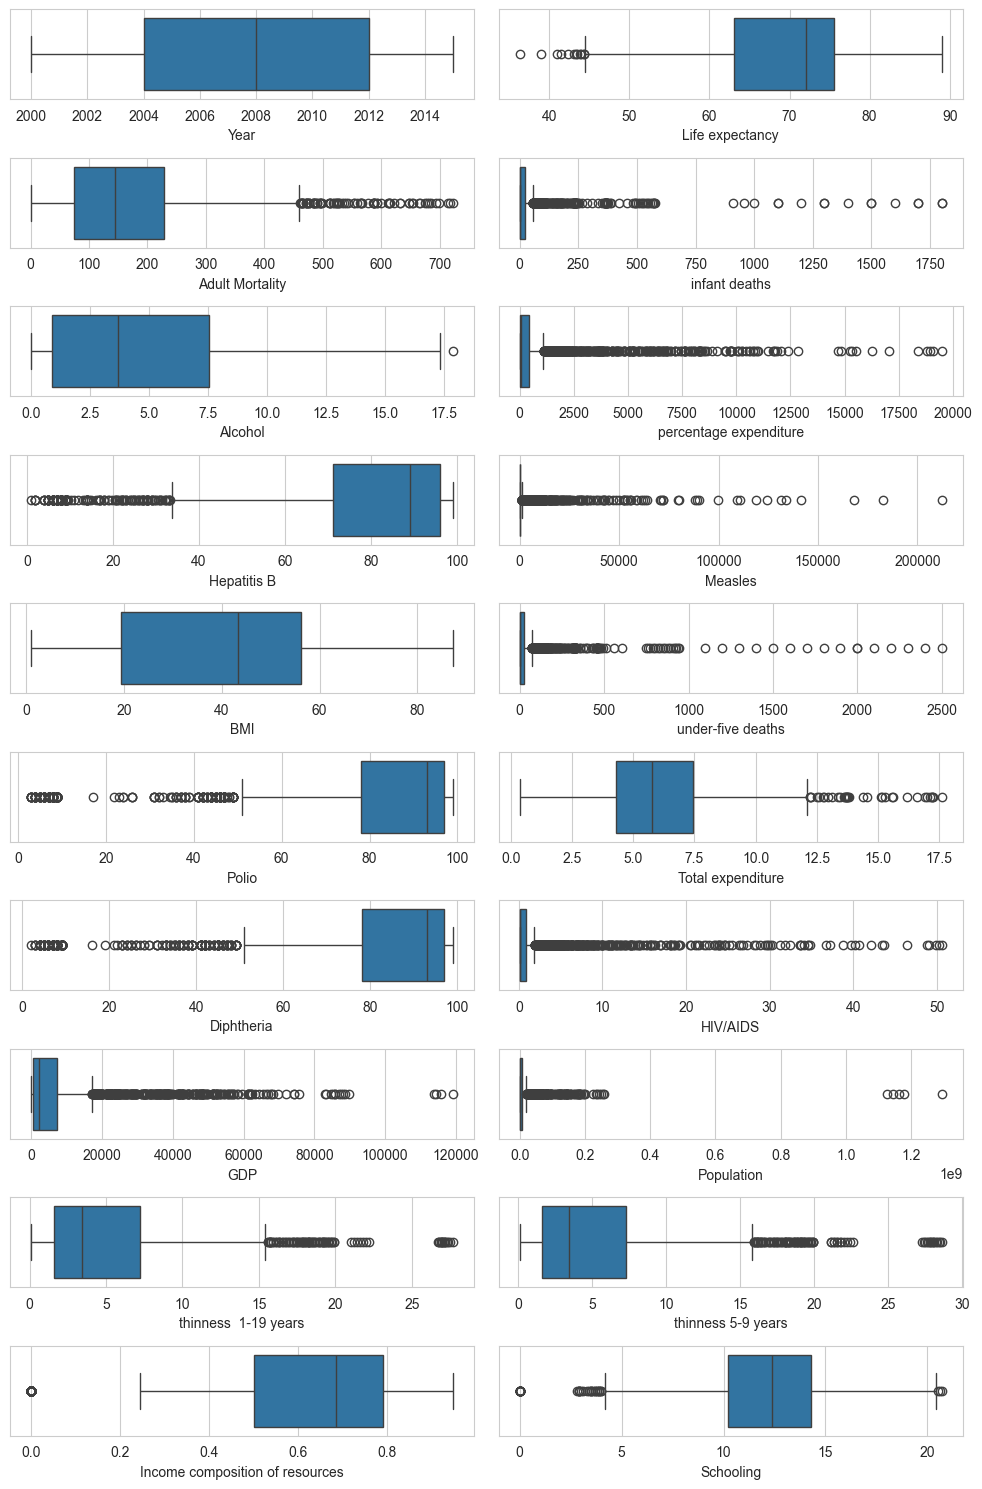

,Total outliers
Year,0
Life expectancy,12
Adult Mortality,82
infant deaths,315
Alcohol,1
percentage expenditure,389
Hepatitis B,248
Measles,542
BMI,0
under-five deaths,394


In [11]:
plt.figure(figsize=(10, 15))
for i, col in enumerate(numeric_cols):
    plt.subplot(10, 2, i + 1)
    sns.boxplot(df, x=col)
plt.tight_layout()
plt.show()

# detect outliers
def detectOutliers(data):
    outliers_arr = []
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col].count()
        outliers_arr.append(outliers)
    return pd.DataFrame(outliers_arr, index=data.columns, columns=["Total outliers"])

numeric_data = df.drop(columns=["Status", "Country"], axis=1)
outliers = detectOutliers(numeric_data)
display(outliers)

Why we should not use variable with high outliers -> because regression can heavily be affected by these outliers, hence we should only choose those with low outliers
Potential variable for regression of target
- Year
- Adult Mortality
- Alcohol
- BMI
- Total expenditure
- thinness 1-19 years
- thinness 5-9 years
- Income composition of resources
- Schooling

One reason is that there was a large differences between developed, devloping and underdeveloped country.
This can be the primary factor explained why outliers existed. Hence they are not abnormal observations.
->Assumption 1: OUTLIERS SHOULD NOT BE REMOVED

#### Dealing with outliers

In [12]:
potential_var = outliers[(outliers["Total outliers"] < 150)].index
outliers_var = outliers[(outliers["Total outliers"] > 0) & (outliers["Total outliers"] < 150)].index
df_outliers = df.copy()

##### With ouliers

,Total outliers
Year,0
Life expectancy,12
Adult Mortality,82
Alcohol,1
BMI,0
Total expenditure,35
thinness 1-19 years,89
thinness 5-9 years,97
Income composition of resources,130
Schooling,53


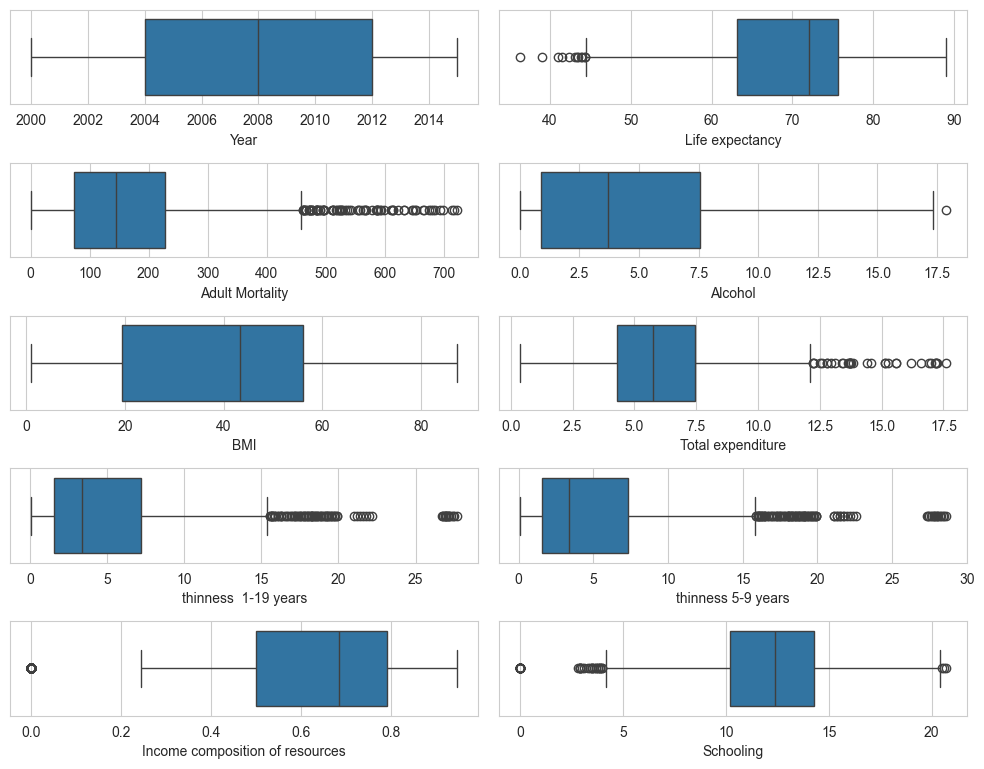

In [13]:
display(detectOutliers(df_outliers[potential_var]))
plt.figure(figsize=(10, 15))
for i, col in enumerate(potential_var):
    plt.subplot(10, 2, i + 1)
    sns.boxplot(df_outliers, x=col)
plt.tight_layout()
plt.show()

##### Without ouliers

,Total outliers
Year,0
Life expectancy,0
Adult Mortality,0
Alcohol,0
BMI,0
Total expenditure,0
thinness 1-19 years,0
thinness 5-9 years,0
Income composition of resources,0
Schooling,0


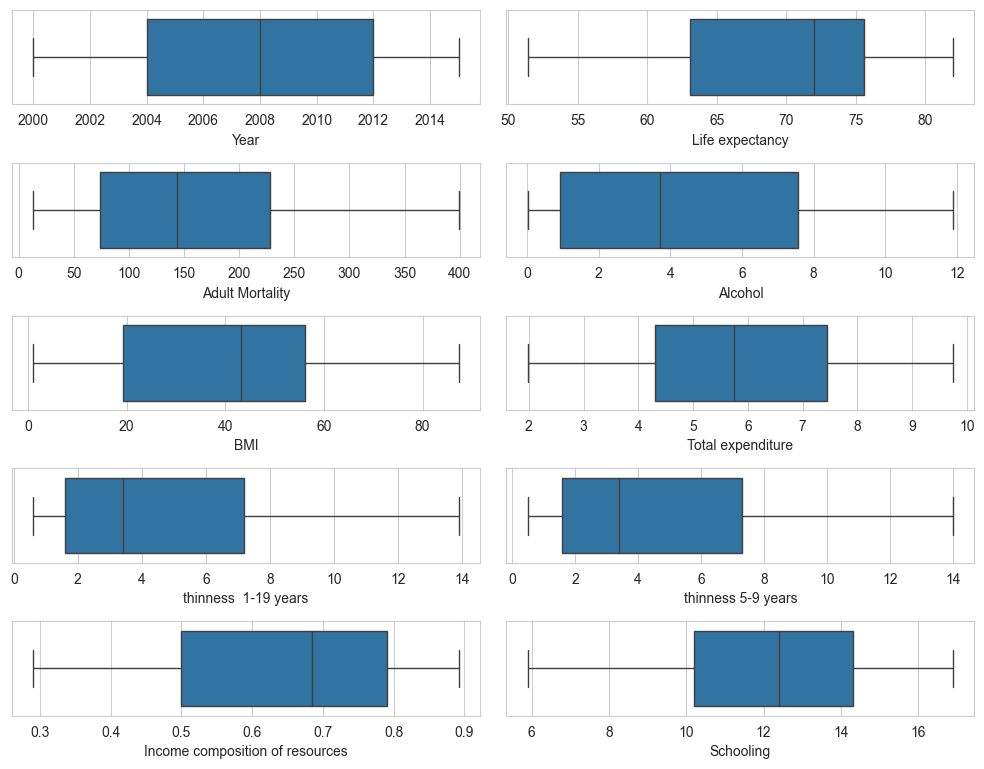

In [14]:
for col in outliers_var:
    if col != "BMI":
        df_outliers[col] = winsorize(df_outliers[col], limits=[0.05, 0.05])

display(detectOutliers(df_outliers[potential_var]))
plt.figure(figsize=(10, 15))
for i, col in enumerate(potential_var):
    plt.subplot(10, 2, i + 1)
    sns.boxplot(df_outliers, x=col)
plt.tight_layout()
plt.show()

### Comprare statistic between with and without outliers

In [15]:
# assign new dataframe to use for regression
df_reg_n = df[potential_var]
df_reg_y = df_outliers[potential_var]
display(df_reg_n.describe().T)
display(df_reg_y.describe().T)

,count,mean,std,min,25%,50%,75%,max
Year,2938.0000,2007.5187,4.6138,2000.0000,2004.0000,2008.0000,2012.0000,2015.0000
Life expectancy,2938.0000,69.2149,9.5108,36.3000,63.1000,72.0000,75.6000,89.0000
Adult Mortality,2938.0000,164.7446,124.2266,1.0000,74.0000,144.0000,228.0000,723.0000
Alcohol,2938.0000,4.5502,3.9948,0.0100,0.9025,3.7025,7.5500,17.8700
BMI,2938.0000,38.2987,19.9914,1.0000,19.3250,43.2500,56.1000,87.3000
Total expenditure,2938.0000,5.9406,2.4457,0.3700,4.3125,5.7550,7.4400,17.6000
thinness 1-19 years,2938.0000,4.8823,4.4334,0.1000,1.6000,3.4000,7.2000,27.7000
thinness 5-9 years,2938.0000,4.9204,4.5325,0.1000,1.6000,3.4000,7.3000,28.6000
Income composition of resources,2938.0000,0.6344,0.2096,0.0000,0.5000,0.6840,0.7911,0.9480
Schooling,2938.0000,12.0752,3.3430,0.0000,10.2000,12.4000,14.3000,20.7000


,count,mean,std,min,25%,50%,75%,max
Year,2938.0000,2007.5187,4.6138,2000.0000,2004.0000,2008.0000,2012.0000,2015.0000
Life expectancy,2938.0000,69.2882,8.8951,51.4000,63.1000,72.0000,75.6000,82.0000
Adult Mortality,2938.0000,159.9130,109.9059,13.0000,74.0000,144.0000,228.0000,399.0000
Alcohol,2938.0000,4.4951,3.8759,0.0100,0.9025,3.7025,7.5500,11.9000
BMI,2938.0000,38.2987,19.9914,1.0000,19.3250,43.2500,56.1000,87.3000
Total expenditure,2938.0000,5.8642,2.1513,1.9800,4.3125,5.7550,7.4400,9.7500
thinness 1-19 years,2938.0000,4.7030,3.8065,0.6000,1.6000,3.4000,7.2000,13.9000
thinness 5-9 years,2938.0000,4.7166,3.8403,0.5000,1.6000,3.4000,7.3000,14.0000
Income composition of resources,2938.0000,0.6464,0.1750,0.2900,0.5000,0.6840,0.7911,0.8920
Schooling,2938.0000,12.1127,2.9745,5.9000,10.2000,12.4000,14.3000,16.9000


# Linear Regression Analysis

## Correlation Matrix

### With outliers

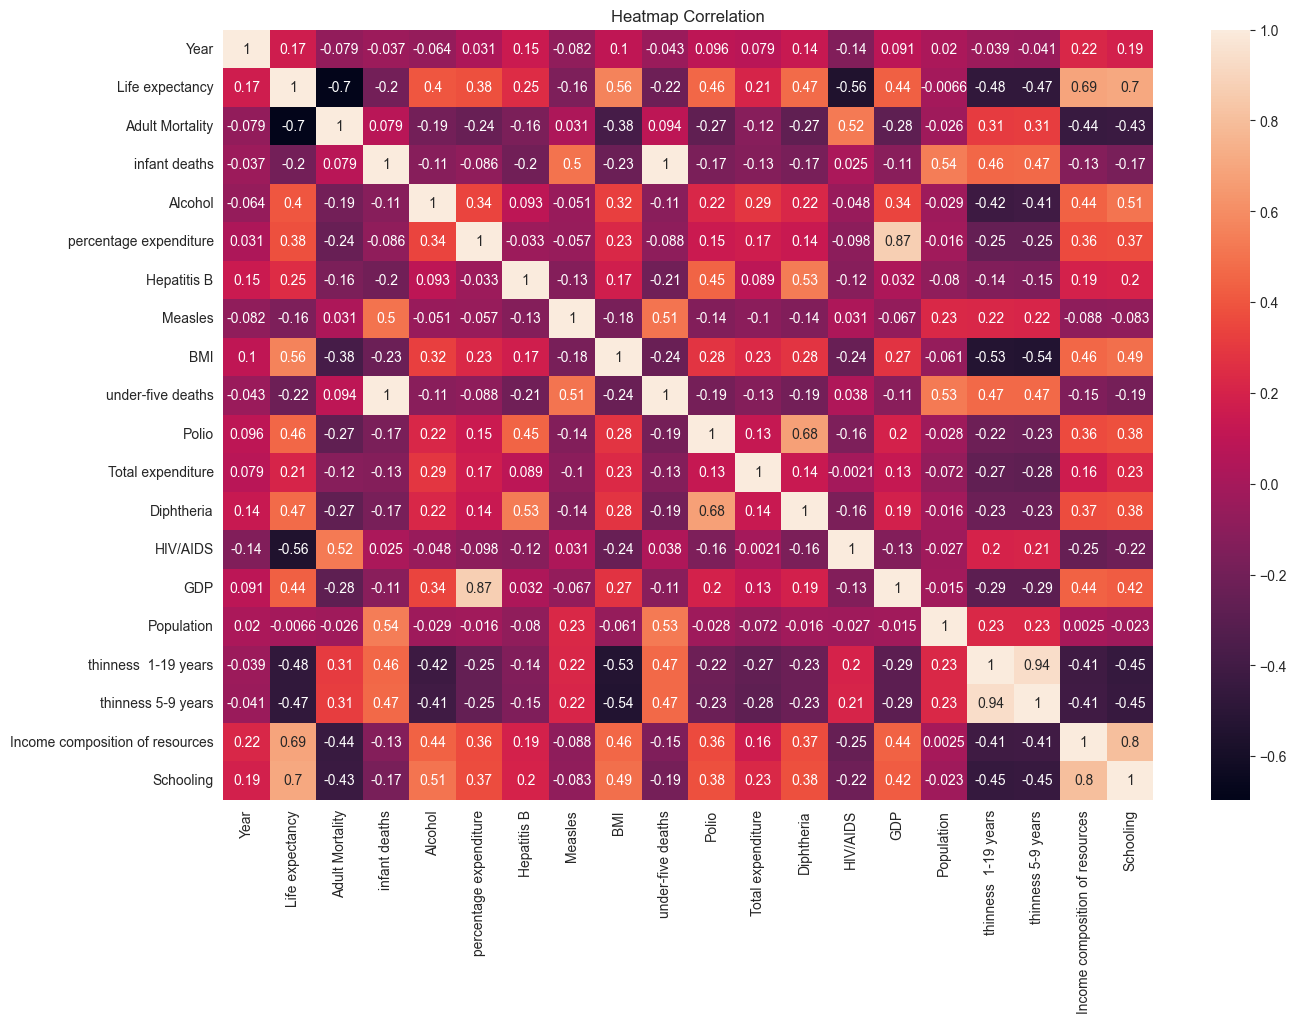

Variables have correlation larger than 0.5: 
Adult Mortality                   -0.6957
BMI                                0.5564
HIV/AIDS                          -0.5559
Income composition of resources    0.6909
Schooling                          0.7043
Name: Life expectancy, dtype: float64


In [16]:
numeric_df = df.drop(columns=["Country", "Status"])
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True)
plt.title('Heatmap Correlation')
plt.show()

# get variables that has high correlation with Life expectancy
corrs = numeric_df.corr()['Life expectancy'].drop('Life expectancy')
high_corr = corrs[corrs.abs() > 0.5]
print("Variables have correlation larger than 0.5: ")
print(high_corr)

### Without outliers

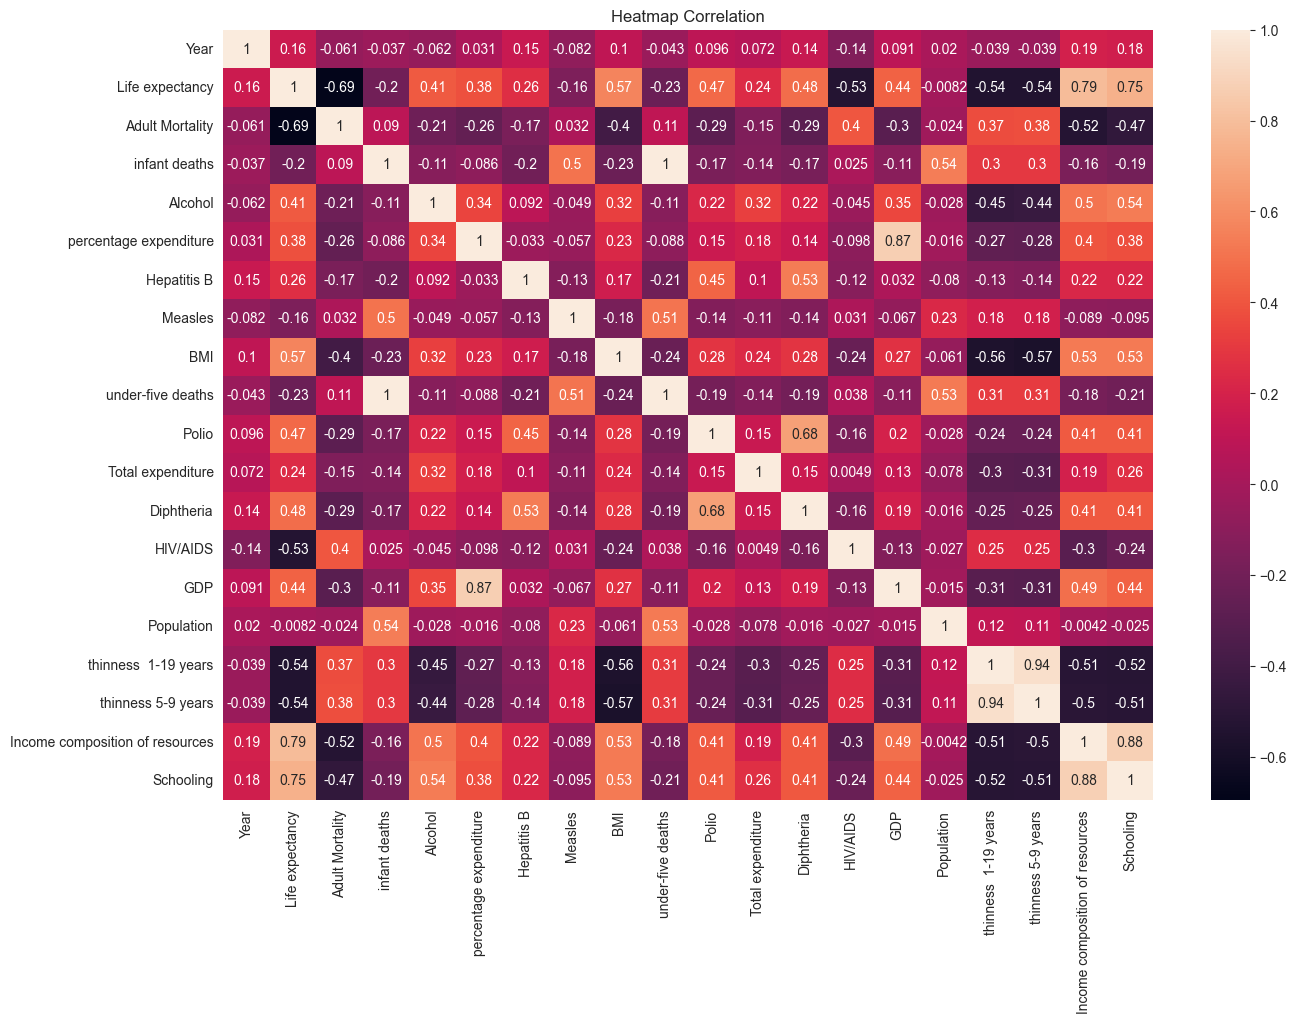

Variables have correlation larger than 0.5: 
Adult Mortality                   -0.6938
BMI                                0.5672
HIV/AIDS                          -0.5286
thinness  1-19 years              -0.5444
thinness 5-9 years                -0.5445
Income composition of resources    0.7913
Schooling                          0.7469
Name: Life expectancy, dtype: float64


In [17]:
numeric_df_outliers = df_outliers.drop(columns=["Country", "Status"])
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df_outliers.corr(), annot=True)
plt.title('Heatmap Correlation')
plt.show()

# get variables that has high correlation with Life expectancy
corrs = numeric_df_outliers.corr()['Life expectancy'].drop('Life expectancy')
high_corr = corrs[corrs.abs() > 0.5]
print("Variables have correlation larger than 0.5: ")
print(high_corr)

Corralations between with and without outliers does not change too much, which indicates
that the outliers does not generally affect our data
->Confirm assumption: OUTLIERS ARE NOT REMOVED

In [18]:
# update data use for regress
df_regress = df_reg_y[["Life expectancy", "BMI", "Adult Mortality"]]

## Least square regression

In [19]:
X1 = df_regress['Adult Mortality']
X2 = df_regress['BMI']
y = df_regress['Life expectancy']

model1 = smf.ols(formula='y ~ X1', data=df_regress).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     2725.
Date:                Wed, 12 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:30:34   Log-Likelihood:                -9624.9
No. Observations:                2938   AIC:                         1.925e+04
Df Residuals:                    2936   BIC:                         1.927e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     78.2677      0.209    375.000      0.0

In [20]:
model2 = smf.ols(formula='y ~ X2', data=df_regress).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     1392.
Date:                Wed, 12 Jun 2024   Prob (F-statistic):          9.06e-250
Time:                        20:30:34   Log-Likelihood:                -10019.
No. Observations:                2938   AIC:                         2.004e+04
Df Residuals:                    2936   BIC:                         2.005e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.6230      0.292    204.068      0.0

In [21]:
model3 = smf.ols(formula='y ~ X1 + X2', data=df_regress).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     2042.
Date:                Wed, 12 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:30:34   Log-Likelihood:                -9308.6
No. Observations:                2938   AIC:                         1.862e+04
Df Residuals:                    2935   BIC:                         1.864e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.5964      0.344    204.999      0.0

## Check residuals for 4 assumptions

### Assumption 1: Linearity

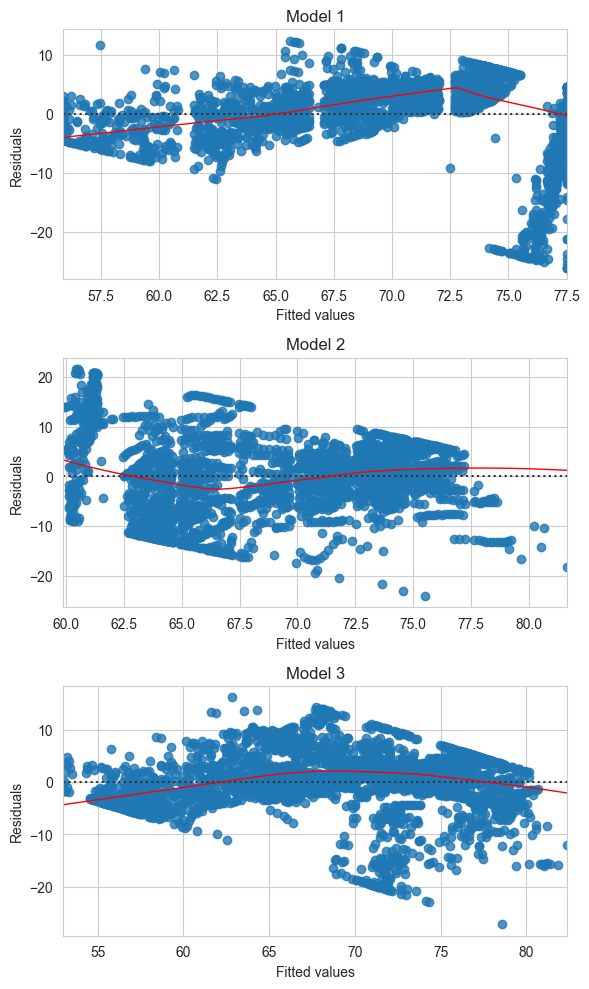

In [22]:
models = [model1, model2, model3]
plt.figure(figsize=(6, 10))
for i, model in enumerate(models):
    plt.subplot(3, 1, i+1)
    sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')
    plt.title(f'Model {i+1}')
plt.tight_layout()
plt.show()

### Assumption 2: Independent

In [23]:
for i, model in enumerate(models):
    d = durbin_watson(model.resid)
    print(f"Model {i+1}: {d}")

    if d<1.5: print("The residuals are positive autocorrelated.\n")
    elif d>2.5: print("The residuals are negative autocorrelated.\n")
    else: print("There is no correlation among the residuals.\n")

Model 1: 0.7723884929964834
The residuals are positive autocorrelated.

Model 2: 0.39837787074489805
The residuals are positive autocorrelated.

Model 3: 0.8195464267628263
The residuals are positive autocorrelated.


H0 (null hypothesis): There is no correlation among the residuals.
HA (alternative hypothesis): The residuals are autocorrelated.

The test statistic always ranges from 0 to 4 where:
- d = 2 indicates no autocorrelation
- d < 2 indicates positive serial correlation
- d > 2 indicates negative serial correlation

In general, if d is less than 1.5 or greater than 2.5 then there is potentially a serious autocorrelation problem.
Otherwise, if d is between 1.5 and 2.5 then autocorrelation is likely not a cause for concern.

### Assumption 3: Homoscedasticity

#### Determine by Graphic

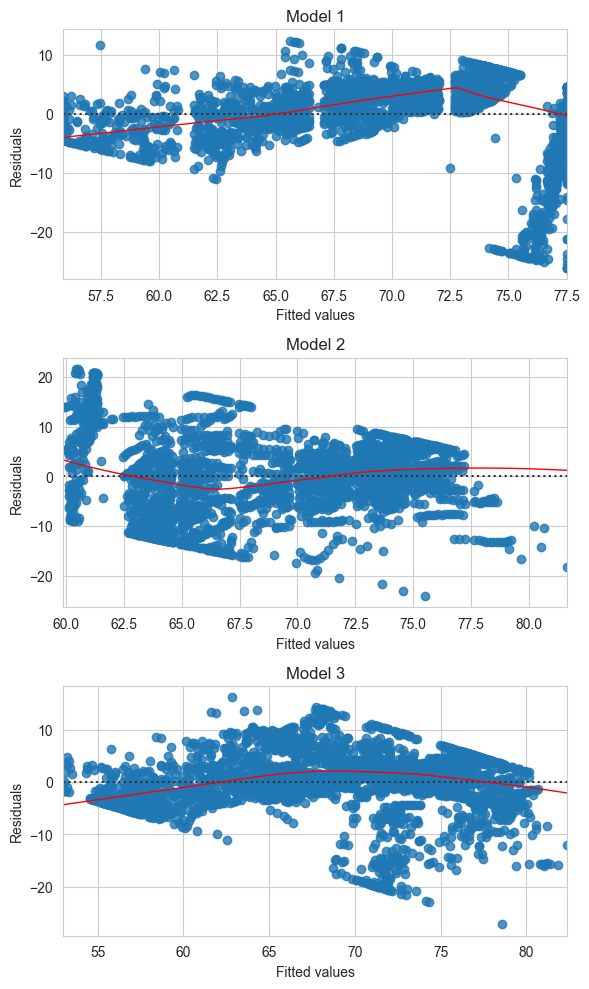

In [24]:
plt.figure(figsize=(6, 10))
for i, model in enumerate(models):
    plt.subplot(3, 1, i+1)
    sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')
    plt.title(f'Model {i+1}')
plt.tight_layout()
plt.show()

Model 1:
- The residuals appear to fan out more as the fitted values increase, especially beyond 70. This indicates an increase in variance of the residuals with higher fitted values, suggesting the presence of heteroscedasticity.
Model 2:
- The residuals show some clustering and appear to have a somewhat funnel-shaped pattern, with a wider spread at the lower and higher ends of the fitted values compared to the middle. This non-constant variance suggests the presence of heteroscedasticity.
Model 3:
- The residuals show a wider spread for lower fitted values and appear to narrow slightly for higher fitted values. This indicates non-constant variance of residuals across the range of fitted values, suggesting heteroscedasticity.

#### Determine by Test

In [25]:
for i, model in enumerate(models):
    white_test = het_white(model.resid, model.model.exog)
    print(f"White test: test statistic = {white_test[0]}, p-value = {white_test[1]}")
    if white_test[1] < 0.05:
        print("Heteroscedasticity is present (residuals are not equally scattered)\n")
    else:
        print("Homoscedasticity is present (residuals are equally scattered)\n")

White test: test statistic = 379.4515386092326, p-value = 4.010008712019157e-83
Heteroscedasticity is present (residuals are not equally scattered)

White test: test statistic = 633.1004959627604, p-value = 3.34175076836411e-138
Heteroscedasticity is present (residuals are not equally scattered)

White test: test statistic = 1036.9322081209473, p-value = 6.063622806365408e-222
Heteroscedasticity is present (residuals are not equally scattered)


### Assumption 4: Normality of Residuals

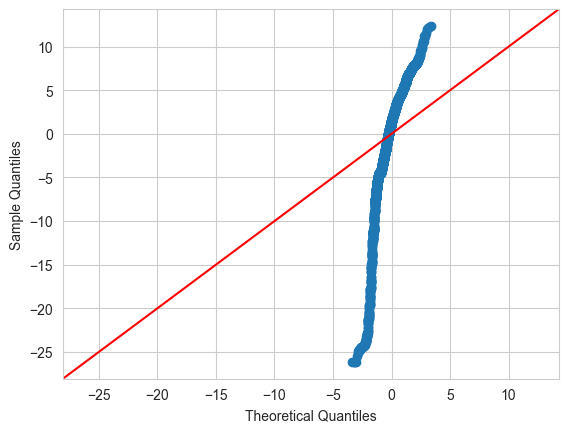

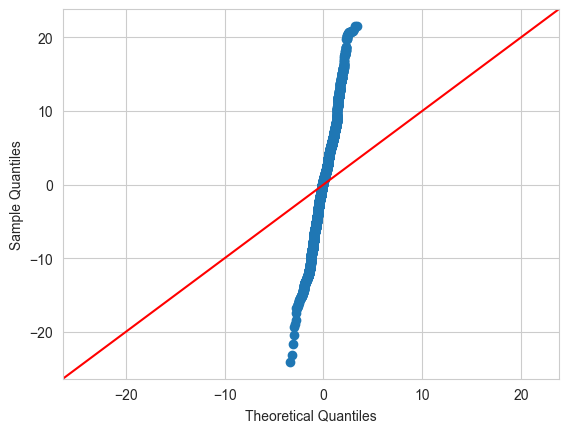

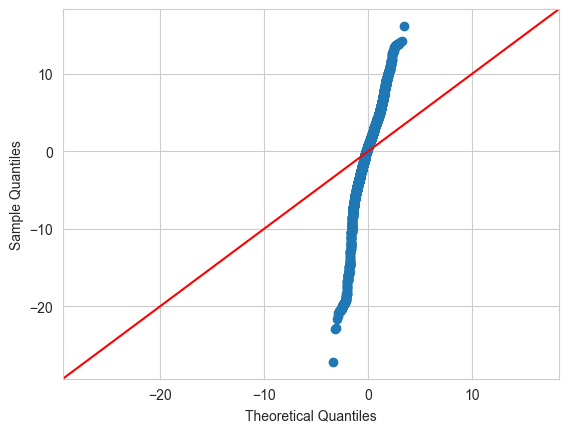

In [26]:
sm.qqplot(model1.resid, line='45');
sm.qqplot(model2.resid, line='45');
sm.qqplot(model3.resid, line='45');

## Normality check

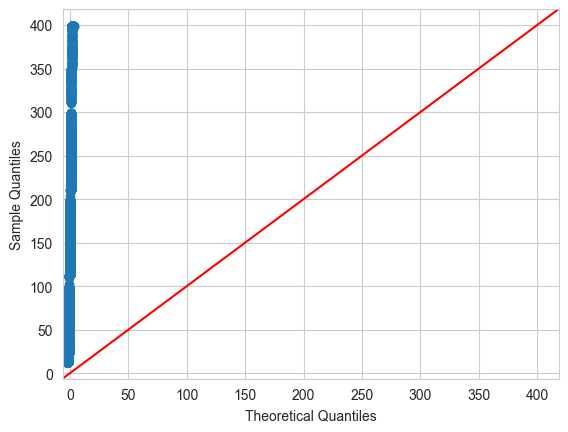

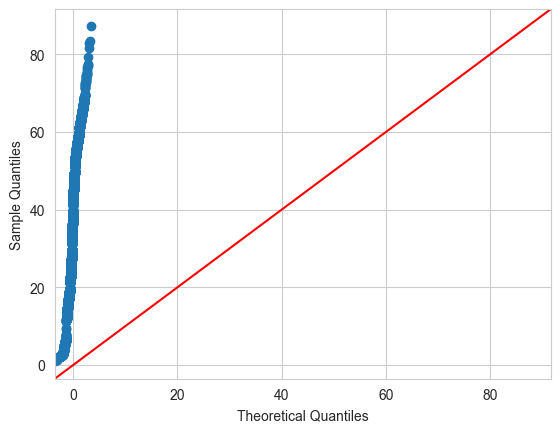

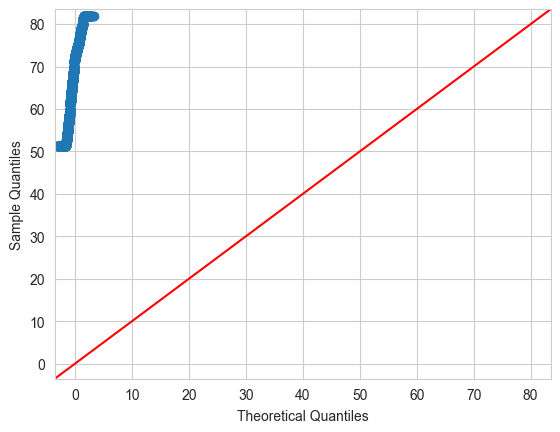

In [27]:
# add semicolon to prevent duplicated graph issue
sm.qqplot(df_regress['Adult Mortality'], line='45');
sm.qqplot(df_regress['BMI'], line='45');
sm.qqplot(df_regress["Life expectancy"], line='45');

In [28]:
# use Shapiro-Wilk test to test again
for col in df_regress.columns:
    test = shapiro(df_regress[col])
    print(f'Test statistic = {test[0]}, p-value = {test[1]}')
    if test[1] > 0.05: print(f'{col} looks normal distributed (fail to reject H0)\n')
    else: print(f'{col} does not normal distributed (reject H0)\n')

Test statistic = 0.9310970846633301, p-value = 7.980497111418431e-35
Life expectancy does not normal distributed (reject H0)

Test statistic = 0.9312720150595797, p-value = 8.652378014696785e-35
BMI does not normal distributed (reject H0)

Test statistic = 0.9365956696730842, p-value = 1.0988645476334773e-33
Adult Mortality does not normal distributed (reject H0)


In [ ]:
import matplotlib.pyplot as plt
data = df_regress['Life expectancy']
plt.hist(data, color='lightgreen', ec='black', bins=100)
print(data)

##### Transform life expectancy

In [ ]:
x = df_regress['Life expectancy']
n = len(x)

y = (stats.rankdata(x)/(n+1))*2 -1
print(np.min(x), np.max(x))
y = np.arctanh(y)
y = np.asarray(y)
print(y)


fig,ax = plt.subplots(1,2,figsize = (7,4))
ax[0].hist(x,bins=100 )
ax[0].set_title('Original Data')
ax[1].hist(y,bins=100 )
ax[1].set_title('Transformed Data')
sm.qqplot(y, line='45');
from scipy.stats import normaltest
stat, p = normaltest(y)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')

##### Transform BMI

In [ ]:
x1 = df_regress['BMI']
n1 = len(x1)

y1 = (stats.rankdata(x1)/(n+1))*2 -1

y1 = np.arctanh(y1)
print(np.min(y1), np.max(y1))
print(x1)


fig,ax = plt.subplots(1,2,figsize = (7,4))
ax[0].hist(x1,bins=100 )
ax[0].set_title('Original Data')
ax[1].hist(y1,bins=100 )
ax[1].set_title('Transformed Data')
sm.qqplot(y1, line='45');

##### Transform adult mortality

In [ ]:
x2 = df_regress['Adult Mortality']
n2 = len(x)

y2 = (stats.rankdata(x2)/(n+6))*2 -1

y2 = np.arctanh(y2)
print(np.min(y2), np.max(y2))


print(x2)


fig,ax = plt.subplots(1,2,figsize = (7,4))
ax[0].hist(x2,bins=100 )
ax[0].set_title('Original Data')
ax[1].hist(y2,bins=100 )
ax[1].set_title('Transformed Data')
sm.qqplot(y2, line='45');

Remark:
Both the Q-Q plot and the Shapiro-Wilk test indicate that our dataset is not normally distributed. However, as our dataset is a sample from the years 2000 to 2015 and  continues to be updated annually, the increase in size may lead it to approximate normality over time, following the Central Limit Theorem (CLT). The CLT suggests that  with a large enough sample size, the sampling distribution of the mean will approximate a normal distribution, regardless of the initial distribution of the data. This principle is particularly important in inferential statistics, where the assumption of normality supports the validity of various statistical tests and the calculation of confidence intervals.

Data tranformed in Q-Q plot performs normality but in Shapiro_Wilk test indicate it is not normal so we decide to analyze in
non-normal.

## Construct confidence interval


### Mean

In [29]:
import numpy as np
from scipy.stats import t

n_bootstrap = 1000
def CI_mean(data, name):
# a) Confidence interval for the mean using bootstrapping
  data_means = []
  for _ in range(n_bootstrap):
    data_boot = np.random.choice(data, size=len(data), replace=True)
    data_means.append(np.mean(data_boot))
  data_ci_low = np.percentile(data_means, 2.5)
  data_ci_high = np.percentile(data_means, 97.5)
  print(f"Confidence interval for mean {name}: ({data_ci_low:.2f}, {data_ci_high:.2f})")
CI_mean(df_regress['BMI'], "BMI")
CI_mean(df_regress['Adult Mortality'], 'Adult Mortality')
CI_mean(df_regress['Life expectancy'], 'Life expectancy')

Confidence interval for mean BMI: (37.60, 39.05)
Confidence interval for mean Adult Mortality: (155.82, 164.01)
Confidence interval for mean Life expectancy: (68.97, 69.60)


### Variance

In [30]:
def CI_var(data, name):
  data_vars = []
  for _ in range(n_bootstrap):
    data_boot = np.random.choice(data, size=len(data), replace=True)
    data_vars.append(np.var(data_boot))  
  data_var_ci_low = np.percentile(data_vars, 2.5)
  data_var_ci_high = np.percentile(data_vars, 97.5)

  print(f"Confidence interval for variance {name}: ({data_var_ci_low:.2f}, {data_var_ci_high:.2f})")
CI_var(df_regress['BMI'], "BMI")
CI_var(df_regress['Adult Mortality'], 'Adult Mortality')
CI_var(df_regress['Life expectancy'], 'Life expectancy')

Confidence interval for variance BMI: (387.17, 411.08)
Confidence interval for variance Adult Mortality: (11534.43, 12618.95)
Confidence interval for variance Life expectancy: (75.50, 82.44)


### Proportion

In [31]:
#Confidence interval for proportion of Life expectancy higher than 60
import numpy as np
from scipy.stats import binom

# Assuming you have the dataframe 'df' with columns 'EPDS' and 'PROMIS_Anxiety'

# Define the significance level
alpha = 0.05

# a) Confidence interval for the proportion of EPDS >= 13
LElarger60 = df_regress[df_regress['Life expectancy'] >= 60]
LE_total = len(df_regress['Life expectancy'])
LE_larger60_len = len(LElarger60)
LE_larger60_proportion = LE_larger60_len / LE_total


LElarger60_ci_low = binom.ppf(alpha/2, LE_total, LE_larger60_proportion) / LE_total
LElarger60_ci_high = binom.ppf(1 - alpha/2, LE_total, LE_larger60_proportion) / LE_total

print(f"Confidence interval for proportion of Life Expectancy larger than 60 : ({LElarger60_ci_low:.4f}, {LElarger60_ci_high:.4f})")

Confidence interval for proportion of Life Expectancy larger than 60 : (0.7849, 0.8138)


## Perform hypothesis testing

### Propotion

In [32]:
def ztest_propotion(n_counts, n_trials, p0, alpha, method, tail_type):
    p_hat = n_counts/n_trials
    z_test = (p_hat - p0) / np.sqrt(p0 * (1 - p0) / n_trials)

    match(method):
        case "c":
            match(tail_type):
                case "left":
                    z_crit = stats.norm.ppf(1-alpha)
                    if z_test < z_crit: 
                        return "Reject null hypothesis."
                    else: 
                        return "Fail to reject null hypothesis."
                case "right":
                    z_crit = stats.norm.ppf(alpha)
                    if z_test > z_crit:
                        return "Reject null hypothesis."
                    else: 
                        return "Fail to reject null hypothesis."
                case "two":
                    # 1-alpha/2 or alpha/2? i think both are ok
                    # since 1-alpha/2 = -alpha/2
                    z_crit = stats.norm.ppf(alpha/2)
                    # z_crit = stats.norm.ppf(1-alpha/2)
                    if abs(z_test) > z_crit:
                        return "Reject null hypothesis."
                    else: 
                        return "Fail to reject null hypothesis."
                case _:
                    return "Invalid option."
        case "p":
            match(tail_type):
                case "left":
                    p_val = stats.norm.cdf(z_test)
                case "right":
                    p_val = 1 - stats.norm.cdf(z_test)
                case "two":
                    p_val = 2 * (1- stats.norm.cdf(z_test))
                case _:
                    return "Invalid option."
            if (p_val < alpha):
                return "Reject null hypothesis."
            else: 
                return "Fail to reject null hypothesis."

# test if the propotion of Life expectancy < 50 is actually in the CI calculate above
counts = len(df_regress[(df_regress["Life expectancy"]<50)])
trials = len(df_regress)
alpha = 0.05
p0 = 0.8
print("Hypothesis testing using critical value: ")
print(ztest_propotion(counts, trials, p0, alpha, "c", "right"))
print()
print("Hypothesis testing using p value: ")
print(ztest_propotion(counts, trials, p0, alpha, "p", "right"))

Hypothesis testing using critical value: 
Fail to reject null hypothesis.

Hypothesis testing using p value: 
Fail to reject null hypothesis.


### Mean

In [33]:
# test if the mean of Life expectancy < 50 is actually in the CI calculate above
def ttest_mean(trials_mean, trials_std, n_trials, u0, alpha, method,tail_type):
    t_test = (trials_mean - u0) / (trials_std * np.sqrt(n_trials))

    match(method):
        case "c":
            match(tail_type):
                case "left":
                    t_crit = stats.t.ppf(q = alpha, df=n_trials-1)
                    if t_test < t_crit:
                        return "Reject null hypothesis."
                    else:
                        return "Fail to reject null hypothesis."
                case "right":
                    t_crit = stats.t.ppf(q = 1 - alpha, df=n_trials-1)
                    if t_test > t_crit:
                        return "Reject null hypothesis."
                    else:
                        return "Fail to reject null hypothesis."
                case "two":
                    # alpha/2 or 1-alpha/2?: both are ok
                    t_crit = stats.t.ppf(q = 1 - alpha / 2, df=n_trials-1)
                    # t_crit = stats.t.ppf(q = alpha / 2, df=n_trials-1)
                    if abs(t_test) > abs(t_crit):
                        return "Reject null hypothesis."
                    else:
                        return "Fail to reject null hypothesis."
                case _:
                    return "Invalid option."
        case "p":
            match(tail_type):
                case "left":
                    p_val = stats.t.cdf(t_test, df=n_trials-1)
                case "right":
                    p_val = 1 - stats.t.cdf(t_test, df=n_trials-1)
                case "two":
                    p_val = 2 * (1 - stats.t.cdf(abs(t_test), df=n_trials-1))
                case _:
                    return "Invalid option."
            if (p_val < alpha):
                return "Reject null hypothesis."
            else: 
                return "Fail to reject null hypothesis."
        case _:
            return "Invalid option."

sample_mean = np.mean(df_regress["BMI"])
sample_std = np.std(df_regress["BMI"], ddof=1)
sample_size = len(df_regress)
mean_test = 10
alpha = 0.05

print("Hypothesis testing using critical value: ")
print(ttest_mean(sample_mean, sample_std, sample_size, mean_test, alpha, "c", "right"))
print()
print("Hypothesis testing using p value: ")
print(ttest_mean(sample_mean, sample_std, sample_size, mean_test, alpha, "p", "right"))

Hypothesis testing using critical value: 
Fail to reject null hypothesis.

Hypothesis testing using p value: 
Fail to reject null hypothesis.


### Standard Deviation

In [34]:
def chitest_std(trials_std, n_trials, std0, alpha, method, tail_type):
    X2_test = (n_trials-1) * trials_std**2 / std0**2

    match(method):
        case "c":
            match(tail_type):
                case "left":
                    X2_crit = stats.chi2.ppf(q = 1 - alpha, df= n_trials-1)
                    if X2_test < X2_crit:
                        return "Reject null hypothesis."
                    else:
                        return "Fail to reject null hypothesis."
                case "right":
                    X2_crit = stats.chi2.ppf(q = alpha, df= n_trials-1)
                    if X2_test > X2_crit:
                        return "Reject null hypothesis."
                    else:
                        return "Fail to reject null hypothesis."
                case "two":
                    X2_crit_low = stats.chi2.ppf(q= alpha / 2, df=n_trials-1)
                    X2_crit_high = stats.chi2.ppf(q= 1 - alpha / 2, df=n_trials-1)
                    if (X2_test < X2_crit_low) | (X2_test > X2_crit_high):
                        return "Reject null hypothesis."
                    else:
                        return "Fail to reject null hypothesis."
                case _:
                    return "Invalid option."
        case "p":
            match(tail_type):
                case "left":
                    p_val = stats.chi2.cdf(X2_test, df=n_trials-1)
                case "right":
                    p_val = 1 - stats.chi2.cdf(X2_test, df=n_trials-1)
                case "two":
                    p_val = 2 * min(stats.chi2.cdf(X2_test, df= n_trials - 1),
                                              1 - stats.chi2.cdf(X2_test, df= n_trials - 1))
                case _:
                    return "Invalid option."
            if (p_val < alpha):
                return "Reject null hypothesis."
            else: 
                return "Fail to reject null hypothesis."
        case _:
            return "Invalid option."

sample_std = np.std(df_regress["BMI"], ddof=1)
sample_size = len(df_regress)
std_test = 21
alpha = 0.05
print("Hypothesis testing using critical value: ")
print(chitest_std(sample_std, sample_size, std_test, alpha, "c", "left"))
print()
print("Hypothesis testing using p value: ")
print(chitest_std(sample_std, sample_size, std_test, alpha, "p", "left"))

Hypothesis testing using critical value: 
Reject null hypothesis.

Hypothesis testing using p value: 
Reject null hypothesis.
